In [115]:
# Import libraries
import pandas as pd
import numpy as np

In [116]:
data = pd.read_csv('boston.csv')  # Loading our data set

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
CRIM          506 non-null float64
ZN            506 non-null float64
INDUS         506 non-null float64
CHAS          506 non-null float64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null float64
TAX           506 non-null float64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
target        506 non-null float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [118]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [119]:
# Replacing 0 values in columns 'ZN' and 'CHAS' with NaN
data.ZN.replace(0, np.nan, inplace = True)
data.CHAS.replace(0, np.nan, inplace = True)

In [120]:
data.info()  # Gives information about our Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
CRIM          506 non-null float64
ZN            134 non-null float64
INDUS         506 non-null float64
CHAS          35 non-null float64
NOX           506 non-null float64
RM            506 non-null float64
AGE           506 non-null float64
DIS           506 non-null float64
RAD           506 non-null float64
TAX           506 non-null float64
PTRATIO       506 non-null float64
B             506 non-null float64
LSTAT         506 non-null float64
target        506 non-null float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [121]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

Unnamed: 0     0.000000
CRIM           0.000000
ZN            73.517787
INDUS          0.000000
CHAS          93.083004
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
target         0.000000
dtype: float64

In [122]:
# As we can see below both “ZN” and “CHAS” are missing more than
# 70% data so we will remove both these features.
data = data.drop(['ZN', 'CHAS', 'Unnamed: 0'], axis = 1)

In [123]:
data.info()  # Describes our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
CRIM       506 non-null float64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(12)
memory usage: 47.5 KB


In [124]:
data.isnull().sum()/ len(data) * 100  # Again calculating percentage of missing values

CRIM       0.0
INDUS      0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
target     0.0
dtype: float64

In [125]:
# To get basic stats about our data like mean, median, count etc. 
# We use .describe() method as shown below:
data.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [126]:
# Splitting the dependent and independent variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [127]:
X.size  # Size of X

5566

In [128]:
y.size # Size of y

506

In [129]:
# Splitting our data into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [130]:
# Importing LinearRegression Class from sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)  # Fitting our model to the training set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
y_pred = model.predict(X_test)
y_pred[0:10]  # Predicted Values

array([26.5799652 , 23.46659043, 27.46693608, 11.85178629, 22.42772808,
       19.66040379, 20.96676958, 21.86076668, 18.95658094, 19.61519733])

In [132]:
y_test = np.array(y_test)
y_test[0:10]  # Expected output

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6])

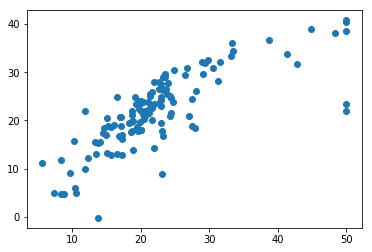

In [133]:
# Making a scatter plot of y_test and y_pred
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

In [134]:
# Calculating the performance metrics
from sklearn import metrics  
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Score:", model.score(X_test, y_test))

MAE 3.773568493778742
MSE 31.332023490151126
RMSE 5.59750153998649
Score: 0.6164944788849184
